In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import os
import librosa
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Flatten
import tensorflow.keras.backend as K
from tensorflow.keras.layers.experimental import preprocessing
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize
import nltk
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
ruslan = pd.read_csv('/content/gdrive/My Drive/metadata.csv', delimiter='|')

In [ ]:
ruslan

,file,text,text2,smthelse;;;;
0,000000_RUSLAN,С тревожным чувством берусь я за перо.,С тревожным чувством берусь я за перо.;;;;,NaN
1,000001_RUSLAN,Кого интересуют признания литературного неудач...,Кого интересуют признания литературного неудач...,NaN
2,000002_RUSLAN,Что поучительного в его исповеди?,Что поучительного в его исповеди?;;;;,NaN
3,000003_RUSLAN,Да и жизнь моя лишена внешнего трагизма.,Да и жизнь моя лишена внешнего трагизма.;;;;,NaN
4,000004_RUSLAN,Я абсолютно здоров.,Я абсолютно здоров.;;;;,NaN
...,...,...,...,...
22195,022195_RUSLAN,"Мы жаждем совершенства, а вокруг торжествует п...","Мы жаждем совершенства, а вокруг торжествует п...",NaN
22196,022196_RUSLAN,Революционер делает попытки установить мировую...,Революционер делает попытки установить мировую...,NaN
22197,022197_RUSLAN,"Он начинает преобразовывать жизнь, достигая ин...","Он начинает преобразовывать жизнь, достигая ин...",NaN
22198,022198_RUSLAN,"Допустим, выводит морковь, совершенно неотличи...","Допустим, выводит морковь, совершенно неотличи...",NaN


In [ ]:
def cut_text(a, num, name):
  for i in range(0, num):
    Y.append(a.loc[i, 'name'])
  return Y

In [ ]:
Y = []
for i in range(0, 22200):
    Y.append(ruslan.loc[i, 'text'])

In [ ]:
another_part = pd.read_csv('/content/gdrive/My Drive/words.txt', delimiter='|')

In [ ]:
another_part

,file,text,tex1,number
0,early_short_stories/early_short_stories_0001.wav,За столицей мудрого царя Соломона шелестел по ...,За столицей мудрого царя Соломона шелестел по ...,9.36
1,early_short_stories/early_short_stories_0002.wav,где происходили свидания Ариэля и Тамары. Ему ...,где происходили свидания Ариэля и Тамары. Ему ...,7.51
2,early_short_stories/early_short_stories_0003.wav,"Но Ариэль был сыном знатного иерусалимца, одно...","Но Ариэль был сыном знатного иерусалимца, одно...",6.97
3,early_short_stories/early_short_stories_0004.wav,"и его волосы были черны, как ночь, а глаза — к...","и его волосы были черны, как ночь, а глаза — к...",9.99
4,early_short_stories/early_short_stories_0005.wav,"не дозволялось обитать среди иудеев, и ее мягк...","не дозволялось обитать среди иудеев, и ее мягк...",8.83
...,...,...,...,...
9594,shortstories_childrenadults/shortstories_child...,"истерзал его, смял и, держа его в руке, вернул...","истерзал его, смял и, держа его в руке, вернул...",8.97
9595,shortstories_childrenadults/shortstories_child...,"Больной, едва дойдя до постели, рухнул на неё ...","Больной, едва дойдя до постели, рухнул на неё ...",8.52
9596,shortstories_childrenadults/shortstories_child...,Лицо его было спокойно и светло; истощённые че...,Лицо его было спокойно и светло; истощённые че...,9.11
9597,shortstories_childrenadults/shortstories_child...,выражали какое-то горделивое счастье. Когда ег...,выражали какое-то горделивое счастье. Когда ег...,6.59


In [ ]:
for i in range(0, 9599):
    Y.append(another_part.loc[i, 'text'])

In [ ]:
phrase = pd.read_csv('/content/gdrive/My Drive/paraphrase.txt', delimiter=',')

In [ ]:
phrase

,Unnamed: 0,Unnamed: 0.1,class,id,id_1,id_2,jaccard,text_1,text_2,ca
0,0,0,0,1,201,8159,0.650000,Полицейским разрешат стрелять на поражение по ...,Полиции могут разрешить стрелять по хулиганам ...,1
1,1,1,0,2,202,8158,0.500000,Право полицейских на проникновение в жилище ре...,Правила внесудебного проникновения полицейских...,1
2,2,2,0,3,273,8167,0.611429,Президент Египта ввел чрезвычайное положение в...,Власти Египта угрожают ввести в стране чрезвыч...,1
3,3,3,-1,4,220,8160,0.324037,Вернувшихся из Сирии россиян волнует вопрос тр...,Самолеты МЧС вывезут россиян из разрушенной Си...,0
4,4,4,0,5,223,8160,0.606218,В Москву из Сирии вернулись 2 самолета МЧС с р...,Самолеты МЧС вывезут россиян из разрушенной Си...,1
...,...,...,...,...,...,...,...,...,...,...
7222,7222,7222,0,25514,34622,34633,0.462500,Путин освободил от должности ряд генералов,Путин снял с должностей более 20 руководителей...,1
7223,7223,7223,-1,25524,34566,34654,0.457143,Облака над Москвой в День Победы разгонят девя...,Путеводитель по Дню Победы: как провести 9 мая...,0
7224,7224,7224,-1,25548,34519,34681,0.584237,Любляна отпразднует День Победы вместе с Москвой,В Москве ограничат движение в связи с Днем Победы,0
7225,7225,7225,-1,25549,34565,34681,0.461880,Девять самолетов ВВС разгонят облака над Москв...,В Москве ограничат движение в связи с Днем Победы,0


In [ ]:
for i in range(0, 7227):
   Y.append(phrase.loc[i, 'text_1'])

In [ ]:
for i in range(0, 7227):
   Y.append(phrase.loc[i, 'text_2'])

In [ ]:
f = os.open("/content/gdrive/My Drive/next-sentence1.txt", os.O_RDONLY)



In [ ]:
k = os.read(f, 300000000)

In [ ]:
k = k.decode('utf-8')

In [ ]:
len(k)

41898037

In [ ]:
type(k)

str

In [ ]:
k = k.split()

In [ ]:
len(k)

5691369

In [ ]:
type(k)

list

In [ ]:
Y= Y.extend(k)

In [ ]:
len(k)

5697816

In [ ]:
len(Y)

46253

In [ ]:
tagged_Y = [TaggedDocument(words=word_tokenize(_d.lower()), tags=[str(i)]) for i, _d in enumerate(k)]

In [ ]:
max_epochs = 10
vec_size = 20
alpha = 0.025

model = Doc2Vec(size=vec_size,
                alpha=alpha, 
                min_alpha=0.00025,
                min_count=1,
                dm =1)
  
model.build_vocab(tagged_Y)

for epoch in range(max_epochs):
    print('iteration {0}'.format(epoch))
    model.train(tagged_Y,
                total_examples=model.corpus_count,
                epochs=model.iter)
    # decrease the learning rate
    model.alpha -= 0.0002
    # fix the learning rate, no decay
    model.min_alpha = model.alpha

/usr/local/lib/python3.6/dist-packages/gensim/models/doc2vec.py:570: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")


KeyboardInterrupt: ignored

In [ ]:
textf = []
for i in range(0,5001):
    textf.append(ruslan.loc[i, 'text'])

In [ ]:
textf

['С тревожным чувством берусь я за перо.',
 'Кого интересуют признания литературного неудачника?',
 'Что поучительного в его исповеди?',
 'Да и жизнь моя лишена внешнего трагизма.',
 'Я абсолютно здоров.',
 'У меня есть любящая родня.',
 'Мне всегда готовы предоставить работу, которая обеспечит нормальное биологическое существование.',
 'Мало того, я обладаю преимуществами.',
 'Мне без труда удается располагать к себе людей.',
 'Я совершил десятки поступков, уголовно наказуемых и оставшихся безнаказанными.',
 'Я дважды был женат, и оба раза счастливо.',
 'Наконец, у меня есть собака.',
 'А это уже излишество.',
 'Тогда почему же я ощущаю себя на грани физической катастрофы?',
 'Откуда у меня чувство безнадежной жизненной непригодности?',
 'В чем причина моей тоски?',
 'Я хочу в этом разобраться.',
 'Постоянно думаю об этом.',
 'Мечтаю и надеюсь вызвать признак счастья.',
 'Мне жаль, что прозвучало это слово.',
 'Ведь представления, которые оно рождает, безграничны до нуля.',
 'Я знал ч

In [ ]:
element_from_Y = textf[0].split()
vector = model.infer_vector(element_from_Y)
vector = vector[np.newaxis, :]
text = vector

In [ ]:
for i in range(1, 5001):
    element_from_Y = Y[i].split()
    vector = model.infer_vector(element_from_Y)
    vector = vector[np.newaxis, :]
    text = np.vstack((text, vector))


In [ ]:
text.shape

(5001, 20)

In [ ]:
path = '/content/gdrive/My Drive/ruslan'
soundlist = sorted(listdir(path))

In [ ]:
b = '/content/gdrive/My Drive/ruslan'
X = []
i = 0 

In [ ]:
def wav2mfcc(file_path, n_mfcc=20, max_len=300):
    wave, sr = librosa.load(file_path, mono=True, sr=None)
    wave = wave[::3]
    mfcc = librosa.feature.mfcc(wave, sr=16000, n_mfcc=n_mfcc)

    # If maximum length exceeds mfcc lengths then pad the remaining ones
    if (max_len > mfcc.shape[1]):
        pad_width = max_len - mfcc.shape[1]
        mfcc = np.pad(mfcc, pad_width=((0, 0), (0, pad_width)), mode='constant')

    # Else cutoff the remaining parts
    else:
        mfcc = mfcc[:, :max_len]
        
    return mfcc

In [ ]:
l_sound = wav2mfcc(b+'/'+soundlist[0], 20, 300)
l_sound = l_sound[np.newaxis, :, :]
X = l_sound

In [ ]:
for file in soundlist[1:]:
    a = str(file)
    l_sound = wav2mfcc(b+'/'+a, 20, 300)
    l_sound = l_sound[np.newaxis, :, :]
    X = np.vstack((X, l_sound))
    i = i+1
    print(i)

Выходные данные были обрезаны до нескольких последних строк (5000).
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
26

In [ ]:
X_train, X_test, text_train, text_test = train_test_split(X, text, test_size=0.3, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(text_train.shape)
print(text_test.shape)

(3500, 20, 300)
(1501, 20, 300)
(3500, 20)
(1501, 20)


In [ ]:
modelR = Sequential()
modelR.add
modelR.add(LSTM(units=300 ,  batch_input_shape = (1,20,300), return_sequences=True))
modelR.add(Dropout(0.2))
modelR.add(Flatten())
modelR.add(Dropout(0.2))
modelR.add(Dense(units=20))

modelR.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
modelR.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (1, 20, 300)              721200    
_________________________________________________________________
dropout_4 (Dropout)          (1, 20, 300)              0         
_________________________________________________________________
flatten_2 (Flatten)          (1, 6000)                 0         
_________________________________________________________________
dropout_5 (Dropout)          (1, 6000)                 0         
_________________________________________________________________
dense_2 (Dense)              (1, 20)                   120020    
Total params: 841,220
Trainable params: 841,220
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = modelR.fit(X_train, text_train, epochs=500, batch_size= 3500, validation_batch_size=1501, validation_data=(X_test, text_test))

Epoch 1/500


2020-10-19 17:57:35,958 : WARNING : Model was constructed with shape (1, 20, 300) for input Tensor("lstm_2_input:0", shape=(1, 20, 300), dtype=float32), but it was called on an input with incompatible shape (3500, 20, 300).


2020-10-19 17:57:36,593 : WARNING : Model was constructed with shape (1, 20, 300) for input Tensor("lstm_2_input:0", shape=(1, 20, 300), dtype=float32), but it was called on an input with incompatible shape (3500, 20, 300).


1/1 [==============================] - ETA: 0s - loss: 0.4225 - accuracy: 0.0529WARNING:tensorflow:Model was constructed with shape (1, 20, 300) for input Tensor("lstm_2_input:0", shape=(1, 20, 300), dtype=float32), but it was called on an input with incompatible shape (1501, 20, 300).


2020-10-19 17:57:44,521 : WARNING : Model was constructed with shape (1, 20, 300) for input Tensor("lstm_2_input:0", shape=(1, 20, 300), dtype=float32), but it was called on an input with incompatible shape (1501, 20, 300).


1/1 [==============================] - 1s 1s/step - loss: 0.4225 - accuracy: 0.0529 - val_loss: 0.4715 - val_accuracy: 0.0740
Epoch 2/500
1/1 [==============================] - 1s 930ms/step - loss: 0.5995 - accuracy: 0.0597 - val_loss: 0.2182 - val_accuracy: 0.0580
Epoch 3/500
1/1 [==============================] - 1s 919ms/step - loss: 0.3368 - accuracy: 0.0609 - val_loss: 0.1871 - val_accuracy: 0.0893
Epoch 4/500
1/1 [==============================] - 1s 921ms/step - loss: 0.2951 - accuracy: 0.0700 - val_loss: 0.2116 - val_accuracy: 0.0866
Epoch 5/500
1/1 [==============================] - 1s 914ms/step - loss: 0.3113 - accuracy: 0.0723 - val_loss: 0.1926 - val_accuracy: 0.0673
Epoch 6/500
1/1 [==============================] - 1s 920ms/step - loss: 0.2828 - accuracy: 0.0571 - val_loss: 0.1563 - val_accuracy: 0.0560
Epoch 7/500
1/1 [==============================] - 1s 915ms/step - loss: 0.2400 - accuracy: 0.0566 - val_loss: 0.1306 - val_accuracy: 0.0546
Epoch 8/500
1/1 [===========

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


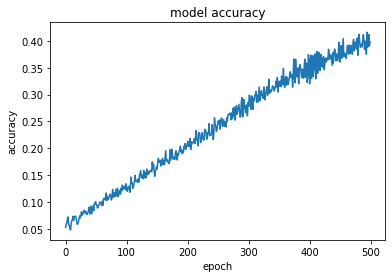

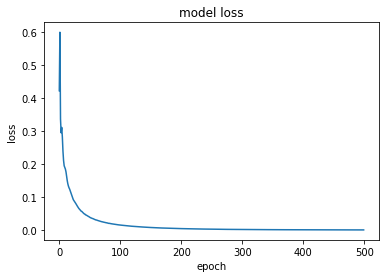

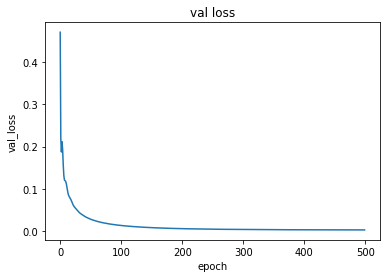

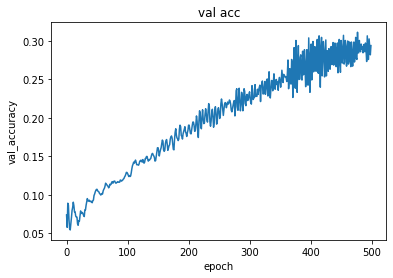

In [ ]:
print(history.history.keys()) 
plt.plot(history.history['accuracy']) 
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()
plt.plot(history.history['loss']) 
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()
plt.plot(history.history['val_loss']) 
plt.title('val loss')
plt.ylabel('val_loss')
plt.xlabel('epoch')
plt.show()
plt.plot(history.history['val_accuracy']) 
plt.title('val acc')
plt.ylabel('val_accuracy')
plt.xlabel('epoch')
plt.show()

In [ ]:
l_sound = wav2mfcc(b+'/'+soundlist[1], 20, 300)
l_sound = l_sound[np.newaxis, :, :]

In [ ]:
pr_vec = modelR.predict(l_sound)
pr_vec

array([[-0.01668822,  0.03618532,  0.00012582, -0.04535139,  0.03127751,
         0.00702875, -0.01659252,  0.04965081, -0.01479166,  0.05824704,
        -0.04579487, -0.00982207,  0.02381927, -0.02805715,  0.04698327,
         0.04138956, -0.00952815,  0.012293  ,  0.00441075,  0.03446307]],
      dtype=float32)

In [ ]:
model.similar_by_vector(pr_vec[0])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similar_by_vector` (Method will be removed in 4.0.0, use self.wv.similar_by_vector() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('полбанке…', 0.8785887360572815),
 ('пилотом', 0.8723385334014893),
 ('колиной', 0.8580358624458313),
 ('отменена', 0.8579896688461304),
 ('автобусах', 0.8575156927108765),
 ('совместное', 0.8573845624923706),
 ('бункере', 0.8560165166854858),
 ('палитру', 0.8523651361465454),
 ('пасcажирских', 0.8504915237426758),
 ('надрывался', 0.8489841222763062)]

In [ ]:
model.infer_vector(Y[1])

array([-0.325168  , -0.02221076, -0.95023274,  0.70273894, -1.0254538 ,
       -0.063902  , -0.6222414 ,  0.1450832 ,  0.20034155, -0.54864556,
       -0.576645  , -0.12723596, -0.15218982, -0.3827464 , -0.69146836,
        1.0437437 ,  0.90535676,  0.05216133,  0.89396256,  0.62663686],
      dtype=float32)

In [ ]:
modelR.save('/content/gdrive/My Drive/ru_modelr')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


2020-10-19 19:07:37,956 : WARNING : From /usr/local/lib/python3.6/dist-packages/tensorflow/python/training/tracking/tracking.py:111: Model.state_updates (from tensorflow.python.keras.engine.training) is deprecated and will be removed in a future version.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


2020-10-19 19:07:37,975 : WARNING : From /usr/local/lib/python3.6/dist-packages/tensorflow/python/training/tracking/tracking.py:111: Layer.updates (from tensorflow.python.keras.engine.base_layer) is deprecated and will be removed in a future version.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


INFO:tensorflow:Assets written to: /content/gdrive/My Drive/ru_modelr/assets


2020-10-19 19:07:40,890 : INFO : Assets written to: /content/gdrive/My Drive/ru_modelr/assets
